# Notebook for datacleaning

Length of inputs before: 621033
Length of inputs after: 609536
Removed rows -11497


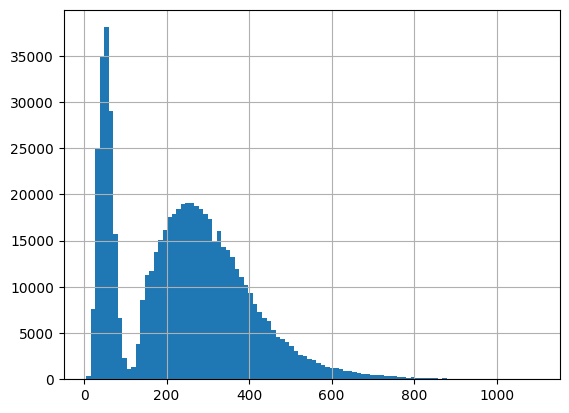

In [ ]:
import pandas as pd
import re

## Data clearning After Distillation

llama_df = pd.read_json("data/training_dataset/dataset_nllb_llama_GPT_DictCheck_split.jsonl",lines =True)

llama_df["input_length"] = llama_df["input"].apply(lambda x: len(x))
llama_df["input_length"].hist(bins=100)


# Remove HTLM tags from the input (Crawler Problem)
html_pattern = r"</?[a-z][\s\S]*?>"
llama_df["is_contain_html"] = llama_df["input"].str.contains(html_pattern, case=False, na=False, regex=True)

# Remove hallucinate data to prevent hallucination inheriting from distilled models
llama_df["is_hallucinate"] =  (llama_df["translated_text"].str.len() > 2.0 * llama_df["input"].str.len())

count_before = len(llama_df)
print (f"Length of inputs before: {len(llama_df)}")
llama_df = llama_df[~llama_df["is_hallucinate"]]
llama_df = llama_df[~llama_df["is_contain_html"]]
count_after = len(llama_df)

print (f"Length of inputs after: {len(llama_df)}")
print (f"Removed rows {(count_after - count_before)}")